# BoxPlots

## Sample 0505-0101

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import json

In [5]:
def create_dict(filename):
    with open(filename, "r") as file:
        dictionary = json.load(file)
        dictionary2 = dict(sorted(dictionary.items()))
    return dictionary2

In [6]:
def get_sample_dict(dictionary, sample, base_1000000 = False):
    sample_dict = {}
    for ko, dict in dictionary.items():
        if base_1000000 == True:
            sample_dict[ko] = float((dict[sample])*1000000)
        else:
            sample_dict[ko] = dict[sample]
    return sample_dict

In [7]:
def get_ko_list(dictionary, sample):
    ko_list = []
    sample_dict = get_sample_dict(dictionary, sample)
    for ko, abun in sample_dict.items():
        if abun != 0:
            ko_list.append(ko)
    return ko_list

In [8]:
def get_common_ko(list1, list2, list3):
    set1 = set(list1)
    set2 = set(list2)
    set3 = set(list3)
    
    intersection = set1.intersection(set2, set3)
    
    return list(intersection)

In [9]:
# def merge_dicts(dict1:dict, dict2:dict):
#     merged_dict = {}
#     #count = 0
#     for ko, abun in dict1.items():
#         try:
#             merged_dict[ko] = [abun, dict2[ko]] # hay keys que no estan en el dict de humann, habria que comprobar si tb pasa al contrario
#         except:
#             #count +=1 
#             merged_dict[ko] = [abun, 0]
    
#     for ko, abun in dict2.items():
#         if ko not in merged_dict.keys():
#             merged_dict[ko] = [0, abun]
#     return merged_dict




In [10]:
def merge_dicts(dict1:dict, dict2:dict):
    merged_dict = {}
    #count = 0
    for ko, abun in dict1.items():
        if ko != 'UNMAPPED':
            if abun != 0:
                try:
                    if dict2[ko] != 0:
                        merged_dict[ko] = [abun, dict2[ko]] # hay keys que no estan en el dict de humann, habria que comprobar si tb pasa al contrario
                except:
                    continue
    return merged_dict

In [11]:
def dif_list(dict1:dict, dict2:dict, log=False):
    dif_list = []
    ko_list = []
    #count = 0
    for ko, abun in dict1.items():
        #if abun != 0 and ko != 'UNMAPPED':
        if ko != 'UNMAPPED':
            ko_list.append(ko)
            try:
                if log == True:
                    dif = (np.log(float(abun) - float(dict2[ko])))
                else:
                    dif = abun - dict2[ko]
                    
                dif_list.append(dif)
            except:
                continue
    
    for ko, abun in dict2.items():
        #if abun != 0 and ko != 'UNMAPPED':
        if ko != 'UNMAPPED' and ko not in ko_list:
            ko_list.append(ko)
            try:
                if log == True:
                    dif = (np.log(float(dict1[ko]) - float(abun)))
                else:
                    dif = dict1[ko] - abun 
                    
                dif_list.append(dif)
            except:
                continue
            
    return dif_list

In [12]:
def dif_list_from_list(dict1, dict2, commmon_list, log = False):
    dif_list = []
    for ko in commmon_list:
        if ko != 'UNMAPPED':
            try:
                if log == True:
                    dif = (np.log(float(dict1[ko]) - float(dict2[ko])))
                else:
                    dif = dict1[ko] - dict2[ko] 
                    if dif > 12000 :
                        print(ko)
                    
                dif_list.append(dif)
            except:
                continue
    return dif_list

In [13]:
ko_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/new_tpm_results/ko_abundance.json'
tm_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/new_tm_results/ko_abundance.json'
noun_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/nf_new_results_rpkm/ko_abundance.json'

ko_squeeze_file = '/Users/lucia/Desktop/TFM/scripts/final/squeeze_results/ko_abundance.json'

ko_humann_file = '/Users/lucia/Desktop/TFM/scripts/final/humann_results/ko_abundance.json'
my_humann_file = '/Users/lucia/Desktop/TFM/scripts/final/my_humann_results/ko_abundance.json'
noun_humann_file = '/Users/lucia/Desktop/TFM/scripts/final/humann_no_unmapped_results/ko_abundance.json'

tm_narrowest_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/narrowest_tm_results/ko_abundance.json'
narrowest_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/narrowest_tpm_results/ko_abundance.json'

In [14]:
rpkm_eggnog_dict = create_dict(ko_eggnog_file)
tm_eggnog_dict = create_dict(tm_eggnog_file)
tm_narrowest_eggnog_dict = create_dict(tm_narrowest_eggnog_file)
narrowest_eggnog_dict = create_dict(narrowest_eggnog_file)
noun_eggnog_dict = create_dict(noun_eggnog_file)


ko_squeeze_dict = create_dict(ko_squeeze_file)

ko_humann_dict = create_dict(ko_humann_file)
my_humann_dict = create_dict(my_humann_file)
noun_humann_dict = create_dict(noun_humann_file)

In [15]:
s0505_0101_rpkm_eggnog = get_sample_dict(rpkm_eggnog_dict, '0505-0101')
s0505_0101_tm_eggnog = get_sample_dict(tm_eggnog_dict, '0505-0101')
s0505_0101_tm_narrowest_eggnog = get_sample_dict(tm_narrowest_eggnog_dict, '0505-0101')
s0505_0101_narrowest_eggnog = get_sample_dict(narrowest_eggnog_dict, '0505-0101')
s0505_0101_noun_eggnog = get_sample_dict(noun_eggnog_dict, '0505-0101', True)

s0505_0101_squeeze = get_sample_dict(ko_squeeze_dict, '0505-0101', True)

s0505_0101_humann = get_sample_dict(ko_humann_dict, '0505-0101', True)
s0505_0101_my_humann = get_sample_dict(my_humann_dict, '0505-0101', True)
s0505_0101_noun_humann = get_sample_dict(noun_humann_dict, '0505-0101', True)

In [16]:
s0505_0101_humann_list = get_ko_list(ko_humann_dict, '0505-0101')
s0505_0101_eggnog_list = get_ko_list(rpkm_eggnog_dict, '0505-0101')
s0505_0101_squeeze_list = get_ko_list(ko_squeeze_dict, '0505-0101')


In [17]:
common_list = get_common_ko(s0505_0101_humann_list, s0505_0101_eggnog_list, s0505_0101_squeeze_list)

K06147
K02004
K06147
K02004


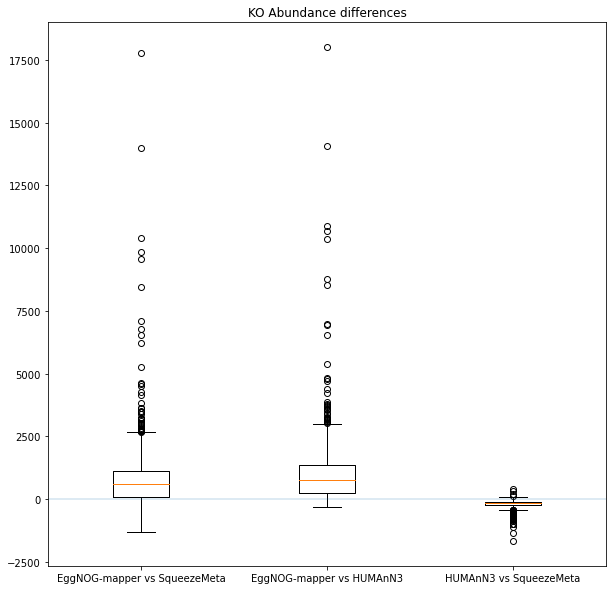

{'K00001': 0.0, 'K00002': 0.0, 'K00003': 2.23399, 'K00004': 0.0, 'K00005': 0.928694, 'K00006': 0.0, 'K00008': 0.0, 'K00009': 0.341808, 'K00010': 0.0, 'K00012': 28.337259999999997, 'K00013': 38.11411999999999, 'K00014': 59.50311, 'K00015': 0.0, 'K00016': 29.143959999999996, 'K00018': 3.7695600000000002, 'K00019': 0.0, 'K00020': 0.0, 'K00021': 0.0, 'K00024': 18.71011, 'K00027': 6.04937, 'K00029': 0.0, 'K00030': 4.23933, 'K00031': 0.0, 'K00033': 0.0, 'K00036': 17.6453, 'K00040': 54.3377, 'K00041': 59.7431, 'K00042': 0.5244399999999999, 'K00045': 0.0, 'K00046': 0.779802, 'K00048': 0.0, 'K00052': 106.18256, 'K00053': 139.32986000000002, 'K00054': 0.0, 'K00057': 27.71342, 'K00058': 16.852538, 'K00059': 83.75229, 'K00060': 0.0, 'K00062': 0.0, 'K00065': 1.25102, 'K00067': 9.415270000000001, 'K00068': 0.0, 'K00073': 0.0, 'K00074': 42.82625, 'K00075': 37.28966, 'K00076': 0.0, 'K00077': 74.67530000000001, 'K00087': 0.0, 'K00088': 2.82411, 'K00090': 0.0, 'K00094': 0.0, 'K00096': 3.05094, 'K00097':

In [18]:
s0505_0101_eggnog_humann_common = dif_list_from_list(s0505_0101_rpkm_eggnog, s0505_0101_humann, common_list)
s0505_0101_eggnog_squeeze_common = dif_list_from_list(s0505_0101_rpkm_eggnog, s0505_0101_squeeze, common_list)
s0505_0101_humann_squeeze_common = dif_list_from_list(s0505_0101_humann, s0505_0101_squeeze, common_list)
plt.figure(figsize = (10,10))
plt.title('KO Abundance differences')
plt.boxplot((s0505_0101_eggnog_squeeze_common, s0505_0101_eggnog_humann_common, s0505_0101_humann_squeeze_common))
plt.axhline(y = 0, alpha=0.2)
plt.xticks([1, 2, 3], ['EggNOG-mapper vs SqueezeMeta', 'EggNOG-mapper vs HUMAnN3', 'HUMAnN3 vs SqueezeMeta'])
plt.show()
print(s0505_0101_humann)
print(s0505_0101_rpkm_eggnog)


K02956
K07473
K04078


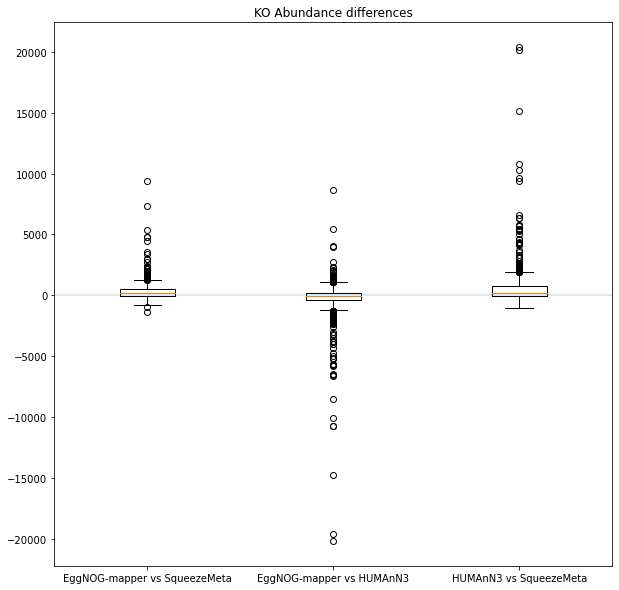

In [19]:
s0505_0101_eggnog_humann_common = dif_list_from_list(s0505_0101_noun_eggnog, s0505_0101_noun_humann, common_list)
s0505_0101_eggnog_squeeze_common = dif_list_from_list(s0505_0101_noun_eggnog, s0505_0101_squeeze, common_list)
s0505_0101_humann_squeeze_common = dif_list_from_list(s0505_0101_noun_humann, s0505_0101_squeeze, common_list)
plt.figure(figsize = (10,10))
plt.title('KO Abundance differences')
plt.boxplot((s0505_0101_eggnog_squeeze_common, s0505_0101_eggnog_humann_common, s0505_0101_humann_squeeze_common))
plt.axhline(y = 0, alpha=0.2)
plt.xticks([1, 2, 3], ['EggNOG-mapper vs SqueezeMeta', 'EggNOG-mapper vs HUMAnN3', 'HUMAnN3 vs SqueezeMeta'])
plt.show()

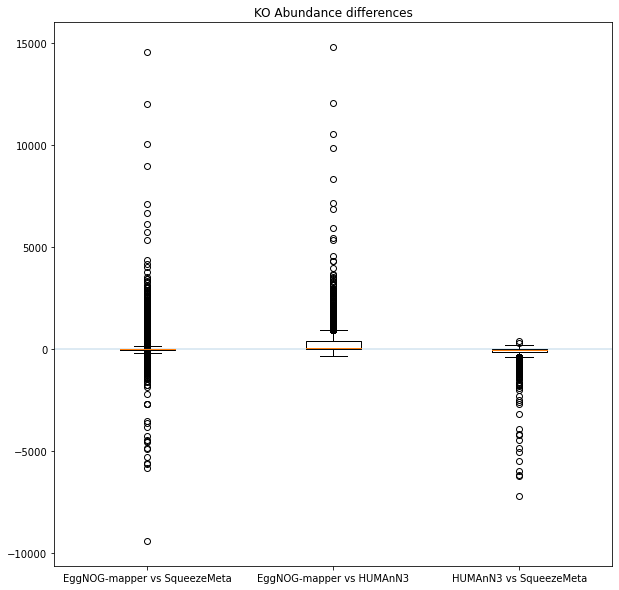

In [20]:
s0505_0101_eggnog_squeeze = dif_list(s0505_0101_narrowest_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = dif_list(s0505_0101_narrowest_eggnog, s0505_0101_humann)
s0505_0101_humann_squeeze = dif_list(s0505_0101_humann, s0505_0101_squeeze)
plt.figure(figsize = (10,10))
plt.title('KO Abundance differences')
plt.boxplot((s0505_0101_eggnog_squeeze, s0505_0101_eggnog_humann, s0505_0101_humann_squeeze))
plt.axhline(y = 0, alpha=0.2)
plt.xticks([1, 2, 3], ['EggNOG-mapper vs SqueezeMeta', 'EggNOG-mapper vs HUMAnN3', 'HUMAnN3 vs SqueezeMeta'])
plt.show()


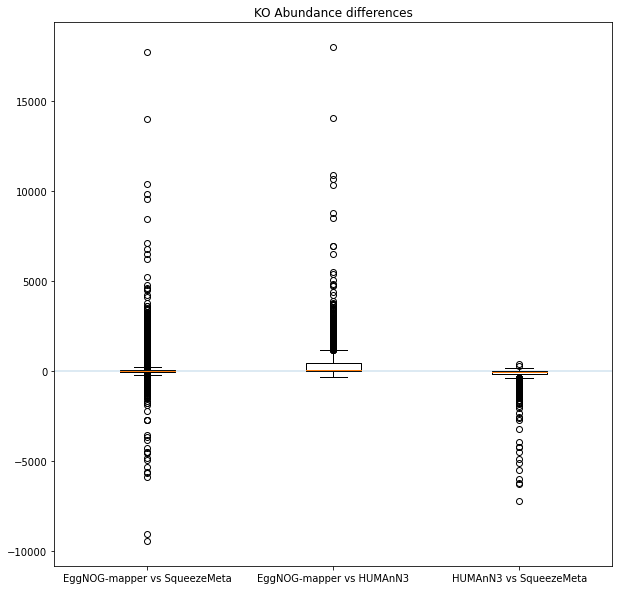

In [21]:
s0505_0101_eggnog_squeeze = dif_list(s0505_0101_rpkm_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = dif_list(s0505_0101_rpkm_eggnog, s0505_0101_humann)
s0505_0101_humann_squeeze = dif_list(s0505_0101_humann, s0505_0101_squeeze)
#s0505_0101_squeeze_humann = dif_list(s0505_0101_squeeze, s0505_0101_humann)
plt.figure(figsize = (10,10))
plt.title('KO Abundance differences')
plt.boxplot((s0505_0101_eggnog_squeeze, s0505_0101_eggnog_humann, s0505_0101_humann_squeeze))
plt.axhline(y = 0, alpha=0.2)
plt.xticks([1, 2, 3], ['EggNOG-mapper vs SqueezeMeta', 'EggNOG-mapper vs HUMAnN3', 'HUMAnN3 vs SqueezeMeta'])
plt.show()

K06147
K06147
K02004
K02956
K07473
K04078


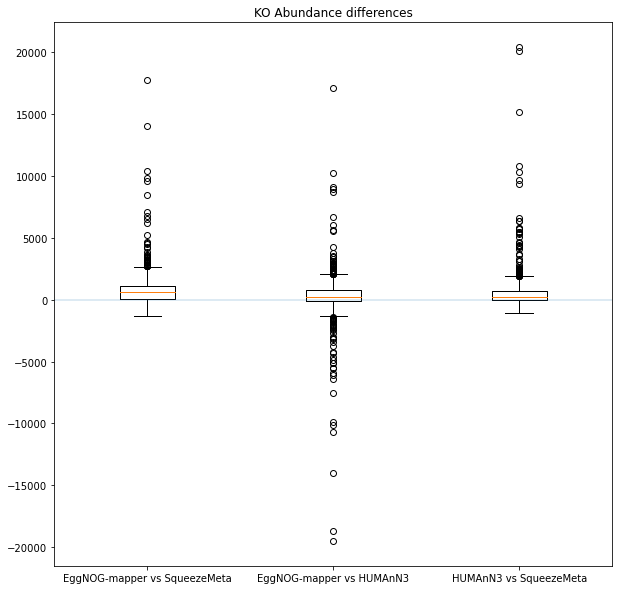

In [22]:
s0505_0101_eggnog_humann_common = dif_list_from_list(s0505_0101_rpkm_eggnog, s0505_0101_noun_humann, common_list)
s0505_0101_eggnog_squeeze_common = dif_list_from_list(s0505_0101_rpkm_eggnog, s0505_0101_squeeze, common_list)
s0505_0101_humann_squeeze = dif_list_from_list(s0505_0101_noun_humann, s0505_0101_squeeze, common_list)
plt.figure(figsize = (10,10))
plt.title('KO Abundance differences')
plt.boxplot((s0505_0101_eggnog_squeeze_common, s0505_0101_eggnog_humann_common, s0505_0101_humann_squeeze_common))
plt.axhline(y = 0, alpha=0.2)
plt.xticks([1, 2, 3], ['EggNOG-mapper vs SqueezeMeta', 'EggNOG-mapper vs HUMAnN3', 'HUMAnN3 vs SqueezeMeta'])
plt.show()

In [23]:
def get_sample_dict(dictionary, sample, base_1000000 = False):
    sample_dict = {}
    for ko, dict in dictionary.items():
        if base_1000000 == True:
            sample_dict[ko] = (dict[sample])/10**6
        else:
            sample_dict[ko] = dict[sample]
    return sample_dict

In [24]:
s0505_0101_rpkm_eggnog = get_sample_dict(rpkm_eggnog_dict, '0505-0101', True)
s0505_0101_tm_eggnog = get_sample_dict(tm_eggnog_dict, '0505-0101', True)
s0505_0101_tm_narrowest_eggnog = get_sample_dict(tm_narrowest_eggnog_dict, '0505-0101', True)
s0505_0101_narrowest_eggnog = get_sample_dict(narrowest_eggnog_dict, '0505-0101', True)

s0505_0101_squeeze = get_sample_dict(ko_squeeze_dict, '0505-0101')

s0505_0101_humann = get_sample_dict(ko_humann_dict, '0505-0101')
s0505_0101_my_humann = get_sample_dict(my_humann_dict, '0505-0101')

In [25]:
s0505_0101_eggnog_squeeze = dif_list(s0505_0101_rpkm_eggnog, s0505_0101_squeeze, True)
s0505_0101_eggnog_humann = dif_list(s0505_0101_rpkm_eggnog, s0505_0101_humann, True)
s0505_0101_humann_squeeze = dif_list(s0505_0101_humann, s0505_0101_squeeze, True)
#s0505_0101_squeeze_humann = dif_list(s0505_0101_squeeze, s0505_0101_humann)

/var/folders/21/9ws0q2h54932tvdhj574sfkc0000gn/T/ipykernel_2697/3577127122.py:11: RuntimeWarning: invalid value encountered in log
  dif = (np.log(float(abun) - float(dict2[ko])))
/var/folders/21/9ws0q2h54932tvdhj574sfkc0000gn/T/ipykernel_2697/3577127122.py:11: RuntimeWarning: divide by zero encountered in log
  dif = (np.log(float(abun) - float(dict2[ko])))


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


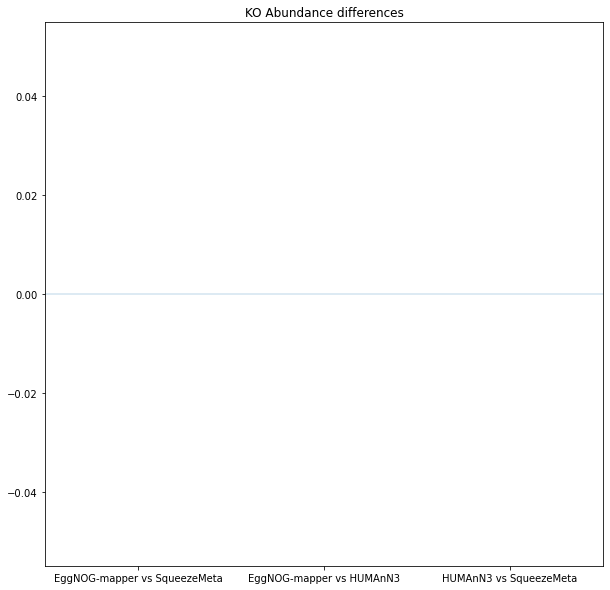

In [26]:
plt.figure(figsize = (10,10))
plt.title('KO Abundance differences')
plt.boxplot((s0505_0101_eggnog_squeeze, s0505_0101_eggnog_humann, s0505_0101_humann_squeeze))
plt.axhline(y = 0, alpha=0.2)
plt.xticks([1, 2, 3], ['EggNOG-mapper vs SqueezeMeta', 'EggNOG-mapper vs HUMAnN3', 'HUMAnN3 vs SqueezeMeta'])
plt.show()

In [27]:
s0505_0101_eggnog_squeeze = dif_list(s0505_0101_rpkm_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = dif_list(s0505_0101_rpkm_eggnog, s0505_0101_humann)
s0505_0101_humann_squeeze = dif_list(s0505_0101_humann, s0505_0101_squeeze)
#s0505_0101_squeeze_humann = dif_list(s0505_0101_squeeze, s0505_0101_humann)

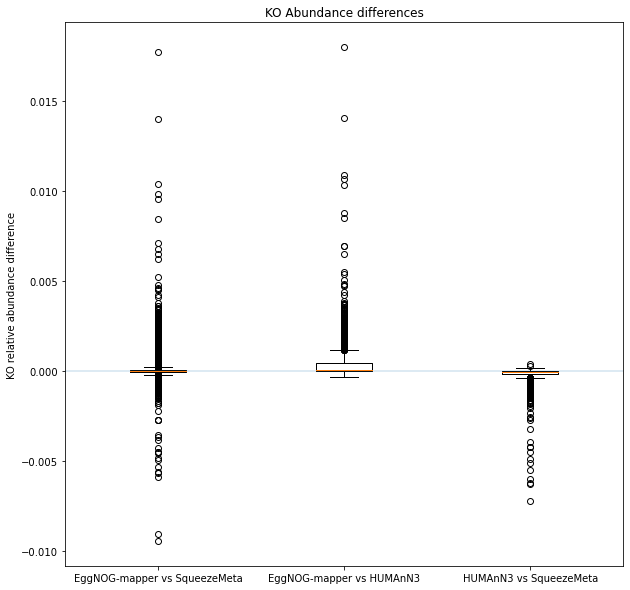

In [28]:
plt.figure(figsize = (10,10))
plt.title('KO Abundance differences')
plt.boxplot((s0505_0101_eggnog_squeeze, s0505_0101_eggnog_humann, s0505_0101_humann_squeeze))
plt.axhline(y = 0, alpha=0.2)
plt.xticks([1, 2, 3], ['EggNOG-mapper vs SqueezeMeta', 'EggNOG-mapper vs HUMAnN3', 'HUMAnN3 vs SqueezeMeta'])
plt.ylabel('KO relative abundance difference')
plt.show()

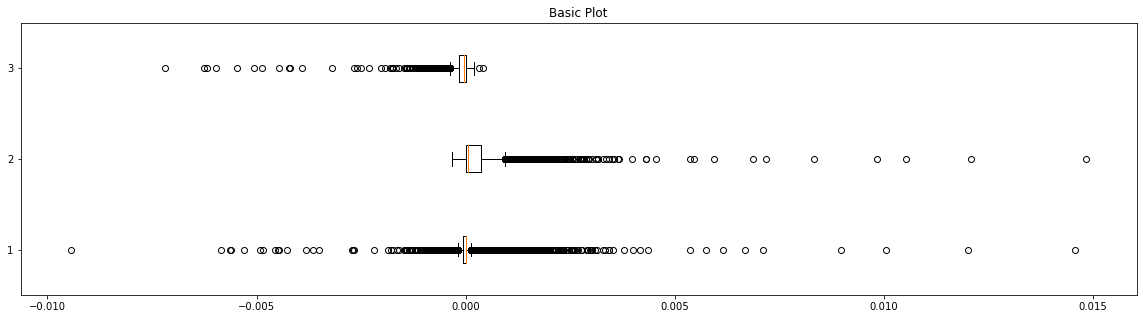

In [29]:
s0505_0101_eggnog_squeeze = dif_list(s0505_0101_narrowest_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = dif_list(s0505_0101_narrowest_eggnog, s0505_0101_humann)
s0505_0101_humann_squeeze = dif_list(s0505_0101_humann, s0505_0101_squeeze)
plt.figure(figsize = (20,5))
plt.title('Basic Plot')
plt.boxplot((s0505_0101_eggnog_squeeze, s0505_0101_eggnog_humann, s0505_0101_humann_squeeze), vert = False)
plt.show()
